#######################PROBLEM 1########################################

In [1]:
#LOADING DATASET
import pandas as pd

In [2]:
#loading dataset#
patient = pd.read_csv('D:\\DATA SCIENCE ASSIGNMENT\\Datasets_Survival Analytics\\Patient.csv')

In [4]:
patient.head(10)

,PatientID,Followup,Eventtype,Scenario
0,John,1.0,1,A
1,Jess,2.0,1,A
2,Ann,3.0,0,A
3,Mary,4.0,0,A
4,Frank,5.0,1,A
5,Steven,6.0,1,A
6,Andy,6.2,1,A
7,Elizabeth,8.0,0,A
8,Joe,9.0,1,A
9,Kate,10.0,0,A


In [6]:
patient.shape

(10, 4)

In [8]:
patient.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Followup,10.0,5.42,2.993994,1.0,3.25,5.5,7.55,10.0
Eventtype,10.0,0.60,0.516398,0.0,0.00,1.0,1.00,1.0


In [12]:
patient['Followup'].describe()

count    10.000000
mean      5.420000
std       2.993994
min       1.000000
25%       3.250000
50%       5.500000
75%       7.550000
max      10.000000
Name: Followup, dtype: float64

In [13]:
##followup ie time of following up with patient for further consultation##
T= patient.Followup

In [14]:
## KaplanMeierFitter model#
from lifelines import KaplanMeierFitter

In [16]:
#Building model#
kmf = KaplanMeierFitter()

In [17]:
##fitting KaplanMeierFitter model on Time and death of event#
kmf.fit(T,event_observed=patient.Eventtype)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 10 total observations, 4 right-censored observations>

<AxesSubplot:xlabel='timeline'>

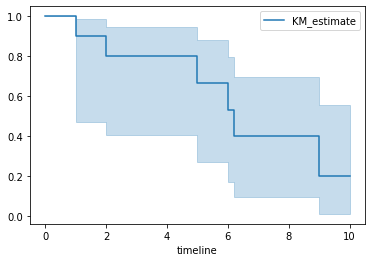

In [18]:
#Plotting using Time Plot#
kmf.plot()

In [19]:
patient.PatientID.value_counts()

John         1
Jess         1
Ann          1
Mary         1
Frank        1
Steven       1
Andy         1
Elizabeth    1
Joe          1
Kate         1
Name: PatientID, dtype: int64

<AxesSubplot:xlabel='timeline'>

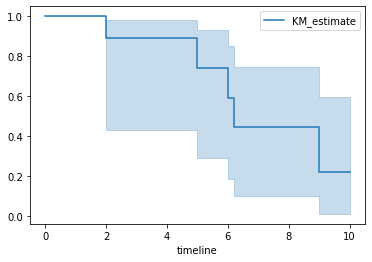

In [21]:
## Apply KaplanMeierFitter on time and events#
kmf.fit(T[patient.PatientID==['Joe','Jess','Ann','Mary','Frank','Steven','Andy', 'Elizabeth', 'Joe' ,  'Kate']], patient.Eventtype[patient.PatientID==['Joe','Jess','Ann','Mary','Frank','Steven','Andy', 'Elizabeth', 'Joe' ,  'Kate']])
kmf.plot()

################################Problem 2###############################################

In [1]:
#LOADING DATASET
import pandas as pd

In [2]:
#loading dataset#
ecg = pd.read_excel('D:\\DATA SCIENCE ASSIGNMENT\\Datasets_Survival Analytics\\ECG_Surv.xlsx')

In [25]:
ecg.head(20)

,survival_time_hr,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,multi_sensor,group
0,11.0,0,71,0,0.260,9.000,4.600,14.00,1.000,1.000,1
1,19.0,0,72,0,0.380,6.000,4.100,14.00,1.700,0.588,1
2,16.0,0,55,0,0.260,4.000,3.420,14.00,1.000,1.000,1
3,57.0,0,60,0,0.253,12.062,4.603,16.00,1.450,0.788,1
4,19.0,1,57,0,0.160,22.000,5.750,18.00,2.250,0.571,1
5,26.0,0,68,0,0.260,5.000,4.310,12.00,1.000,0.857,1
6,13.0,0,62,0,0.230,31.000,5.430,22.50,1.875,0.857,1
7,50.0,0,60,0,0.330,8.000,5.250,14.00,1.000,1.000,1
8,19.0,0,46,0,0.340,0.000,5.090,16.00,1.140,1.003,1
9,25.0,0,54,0,0.140,13.000,4.490,15.50,1.190,0.930,1


In [4]:
ecg.columns

Index(['survival_time_hr', 'alive', 'age', 'pericardialeffusion',
       'fractionalshortening', 'epss', 'lvdd', 'wallmotion-score',
       'wallmotion-index', 'multi_sensor', 'name', 'group'],
      dtype='object')

In [5]:
ecg.shape

(133, 12)

In [6]:
ecg.describe()

,survival_time_hr,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,multi_sensor,group
count,133.000000,133.000000,133.000000,133.000000,133.000000,117.000000,121.000000,128.000000,130.00000,129.000000,133.000000
mean,21.795338,0.383459,62.413534,0.187970,0.228534,12.164769,4.763157,14.438125,1.37800,0.786202,1.984962
std,15.885313,0.488067,9.335601,0.392165,0.135864,7.370159,0.810013,5.018566,0.45185,0.225661,0.590133
min,0.030000,0.000000,23.000000,0.000000,0.010000,0.000000,2.320000,2.000000,1.00000,0.140000,1.000000
25%,6.000000,0.000000,57.000000,0.000000,0.150000,7.000000,4.230000,11.000000,1.00000,0.714000,2.000000
50%,22.000000,0.000000,62.000000,0.000000,0.217000,11.000000,4.650000,14.000000,1.21600,0.786000,2.000000
75%,33.000000,1.000000,68.000000,0.000000,0.280000,16.100000,5.300000,16.500000,1.50750,0.857000,2.000000
max,57.000000,1.000000,86.000000,1.000000,0.840000,40.000000,6.780000,39.000000,3.00000,2.000000,3.000000


In [11]:
ecg['survival_time_hr'].describe()

count    111.000000
mean      22.802072
std       15.836242
min        0.030000
25%       10.000000
50%       24.000000
75%       33.500000
max       57.000000
Name: survival_time_hr, dtype: float64

In [7]:
ecg.isna().sum()

survival_time_hr         0
alive                    0
age                      0
pericardialeffusion      0
fractionalshortening     0
epss                    16
lvdd                    12
wallmotion-score         5
wallmotion-index         3
multi_sensor             4
name                     2
group                    0
dtype: int64

In [9]:
##Remvoving na values#
ecg.dropna(axis= 0, inplace=True)

In [10]:
ecg.isna().sum()

survival_time_hr        0
alive                   0
age                     0
pericardialeffusion     0
fractionalshortening    0
epss                    0
lvdd                    0
wallmotion-score        0
wallmotion-index        0
multi_sensor            0
name                    0
group                   0
dtype: int64

In [12]:
##survival_time_hr refer to time#
T= ecg.survival_time_hr

In [14]:
##removing name column#
ecg.drop('name' , axis=1,inplace=True)

In [15]:
ecg.head()#recheking#

,survival_time_hr,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,multi_sensor,group
0,11.0,0,71,0,0.260,9.000,4.600,14.0,1.00,1.000,1
1,19.0,0,72,0,0.380,6.000,4.100,14.0,1.70,0.588,1
2,16.0,0,55,0,0.260,4.000,3.420,14.0,1.00,1.000,1
3,57.0,0,60,0,0.253,12.062,4.603,16.0,1.45,0.788,1
4,19.0,1,57,0,0.160,22.000,5.750,18.0,2.25,0.571,1


In [16]:
## KaplanMeierFitter model#
from lifelines import KaplanMeierFitter

In [17]:
#Building model#
kmf = KaplanMeierFitter()

In [20]:
##fitting KaplanMeierFitter model on Time and death of event#
kmf.fit(T,event_observed=ecg.alive)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 111 total observations, 71 right-censored observations>

<AxesSubplot:xlabel='timeline'>

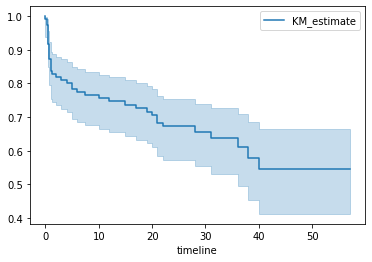

In [21]:
#Plotting using Time Plot#
kmf.plot()

In [22]:
ecg.group.value_counts()

2    65
1    24
3    22
Name: group, dtype: int64

<AxesSubplot:xlabel='timeline'>

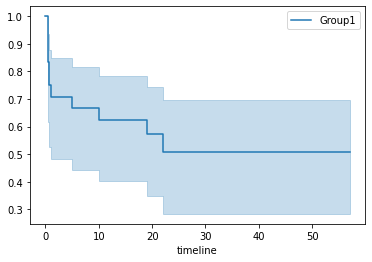

In [26]:
# Applying KaplanMeierFitter model on Time and Events for the group "1"
kmf.fit(T[ecg.group==1],ecg.alive[ecg.group==1], label='Group1')
kmf.plot()

<AxesSubplot:xlabel='timeline'>

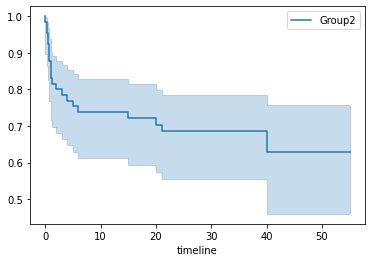

In [27]:
kmf.fit(T[ecg.group==2],ecg.alive[ecg.group==2], label='Group2')
kmf.plot()

<AxesSubplot:xlabel='timeline'>

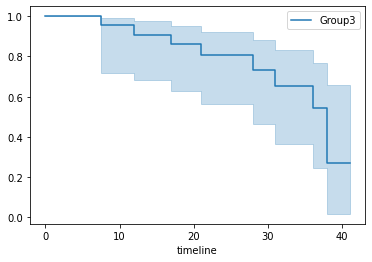

In [28]:
kmf.fit(T[ecg.group==3],ecg.alive[ecg.group==3], label='Group3')
kmf.plot()